In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=14)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
train_target = pd.read_csv('../../data/age-pred/train_target.csv')
train_target.head(5)

,client_id,bins
0,24662,2
1,1046,0
2,34089,2
3,34848,1
4,47076,3


In [8]:
df_vectors = pd.read_pickle('../../data/age-pred/embeddings.pickle').set_index('client_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('client_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v791,v792,v793,v794,v795,v796,v797,v798,v799,bins
client_id,,,,,,,,,,,,,,,,,,,,,
4,-0.000078,-1.068133e-05,-0.002107,0.010914,0.001163,-0.001281,-0.000203,-0.000340,-0.001066,-0.015147,...,-0.009269,-0.000148,0.000810,0.000751,0.000982,0.004240,-0.008819,0.001954,-0.000575,1
6,-0.000057,-2.537305e-07,0.000432,0.011026,0.001039,-0.000949,0.000603,-0.000415,-0.000612,-0.006808,...,-0.003251,0.001617,0.000731,0.000659,0.000568,0.001360,0.000684,0.002996,-0.000517,1
7,-0.000030,-5.379996e-06,-0.003744,0.010102,0.001038,-0.001007,0.001988,-0.000248,-0.001498,-0.003813,...,0.004438,-0.051191,0.000722,0.000675,0.006011,0.000686,-0.039323,0.001063,-0.000511,0
10,-0.000037,-6.374114e-06,0.003418,0.009372,0.001156,-0.001589,0.000485,0.000028,-0.001523,-0.006952,...,0.007262,-0.000322,0.000803,0.000745,0.003929,0.004260,-0.062406,0.001809,-0.000569,3
11,-0.000041,-8.884791e-06,-0.005332,0.009648,0.001026,-0.000769,0.002738,-0.000578,-0.000843,-0.004014,...,0.019592,0.002506,0.000719,0.000681,-0.000187,-0.000320,-0.060272,0.000344,-0.000507,3


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
df_pca = df_vectors.copy()

In [11]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.78708196

In [12]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

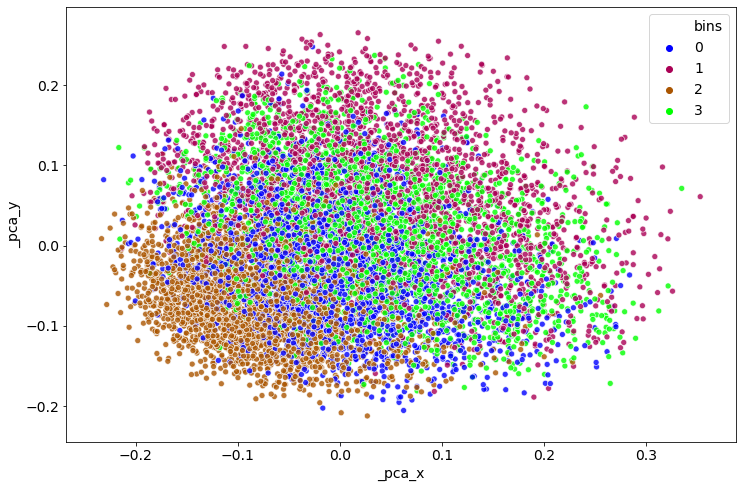

In [13]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='bins',
    # style='bins',
    data=df_pca.sample(n=10000),
    palette='brg',
    alpha=0.8,
    ax=axs,
    markers=['o', 'd', '*' , '.']
)
plt.show()

Относительный порядок категорий: 1 - 3 - 0 - 2

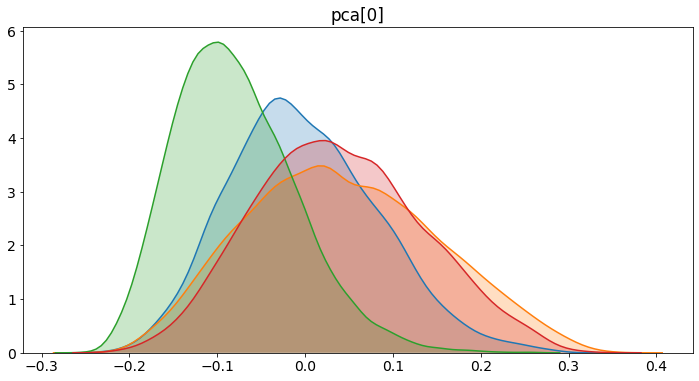

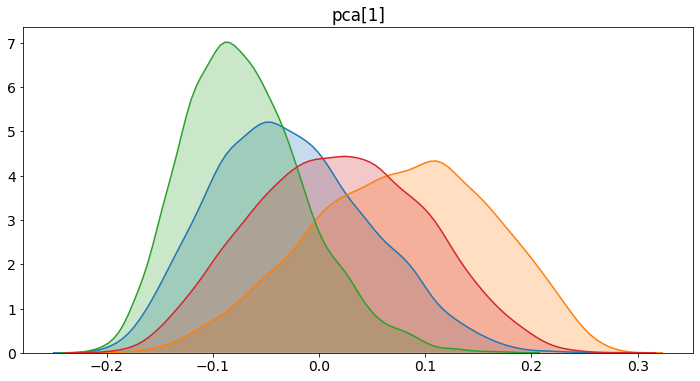

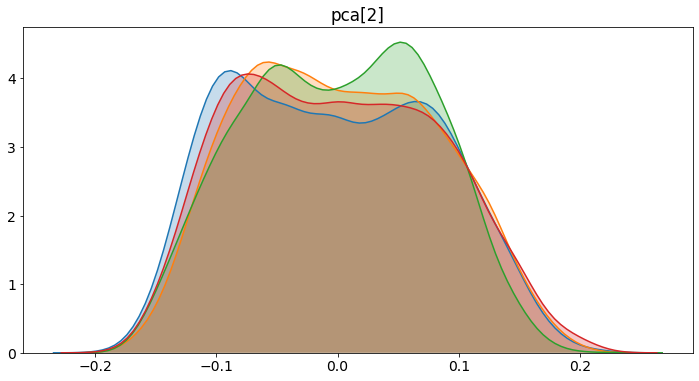

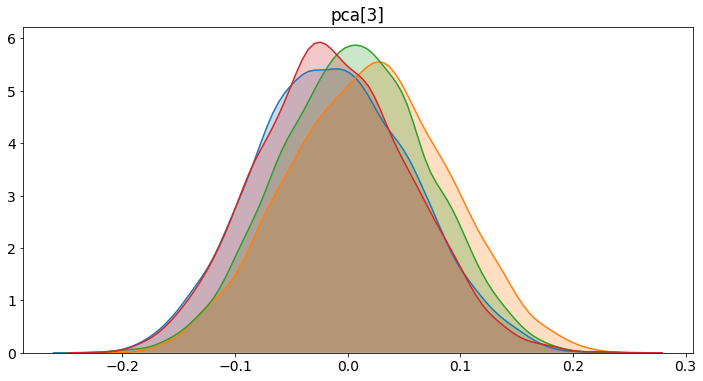

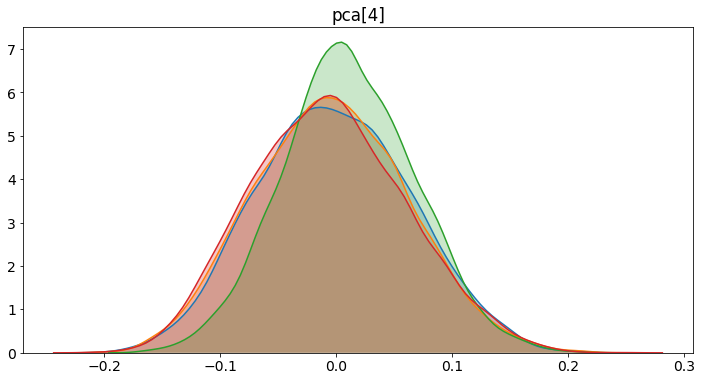

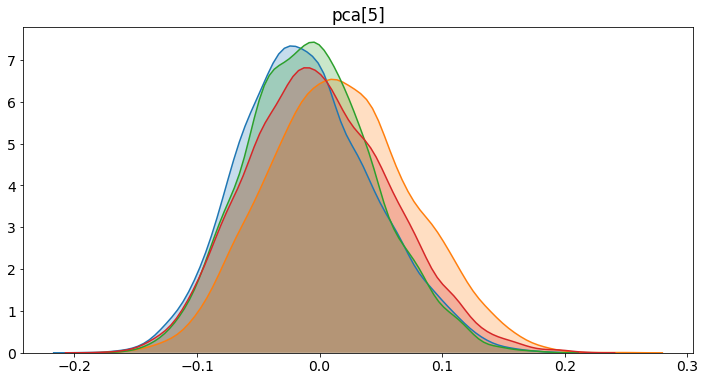

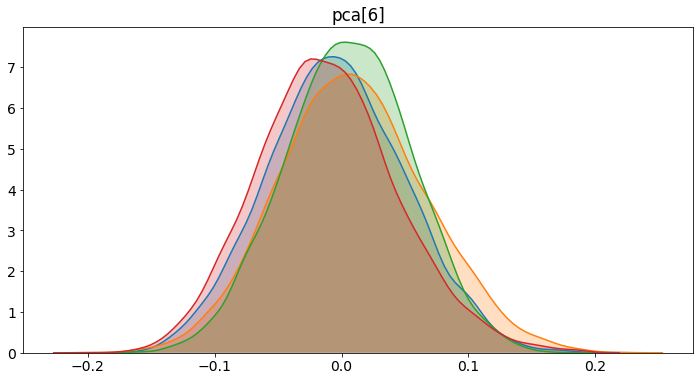

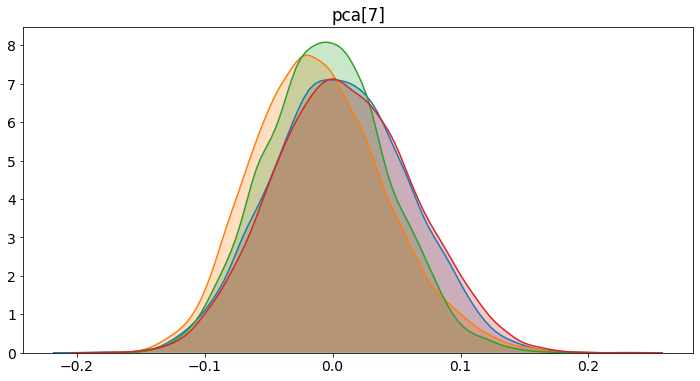

In [14]:
for i in range(8):
    plt.figure(figsize=(12,6))

    for b in [0, 1, 2, 3]:
        ix = np.arange(len(pca_results))[df_pca['bins'].eq(b)]
        sns.kdeplot(pca_results[ix, i], shade=True)
    plt.title(f'pca[{i}]')
    plt.show()

In [15]:
if len(df_pca) > 10000:
    df_tsne = df_pca.sample(n=10000).copy()
else:
    df_tsne = df_pca.copy()

In [16]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.809s...
[t-SNE] Computed neighbors for 10000 samples in 140.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.083762
[t-SNE] KL divergence after 50 iterations with early exaggeration: 97.568153
[t-SNE] KL divergence after 300 iterations: 3.392451


In [18]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

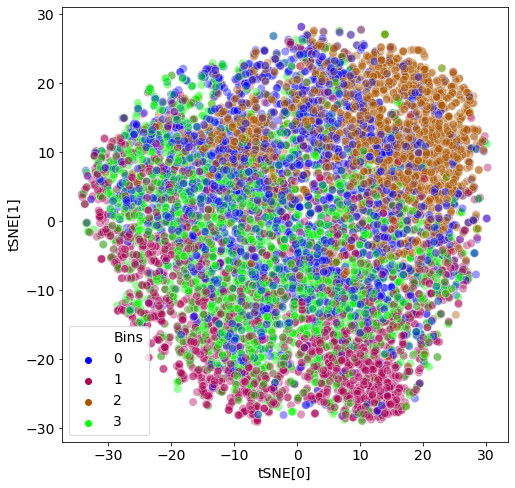

In [19]:
_, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Bins',
    data=df_tsne.rename(columns={'bins': 'Bins'}),
    palette='brg',
    alpha=0.4, s=70,  
    ax=axs,
)
plt.show()